In [21]:
pip install pycaret[full]

In [22]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip

replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [23]:
# All the required imports
import pandas as pd
import pycaret
from pycaret.regression import *

In [24]:
pycaret.__version__

'3.3.2'

In [25]:
# Loading the dataset
data = pd.read_csv('hour.csv')

# Displaying the first few rows
data.head()

# # Shape of the dataset
# print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# # Summary statistics
# data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
# Dropping unnecessary columns
data = data.drop(['instant', 'casual', 'registered'], axis=1)

# Displaying the columns
data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [27]:
reg_setup = setup(data, target='cnt', session_id=123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 14)"
4,Transformed data shape,"(17379, 14)"
5,Transformed train set shape,"(12165, 14)"
6,Transformed test set shape,"(5214, 14)"
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


In [28]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,25.8912,1741.3445,41.7031,0.9467,0.4388,0.4334,2.9680
xgboost,Extreme Gradient Boosting,26.8246,1845.9551,42.9187,0.9435,0.4544,0.4426,0.2080
et,Extra Trees Regressor,26.5635,1930.3188,43.8916,0.9409,0.3379,0.3130,2.7240
lightgbm,Light Gradient Boosting Machine,27.8099,1972.7688,44.3922,0.9396,0.4172,0.4140,0.4760
rf,Random Forest Regressor,29.1830,2323.3433,48.1443,0.9289,0.3592,0.3374,3.9560
dt,Decision Tree Regressor,37.5236,3921.0613,62.5561,0.8801,0.4631,0.4104,0.1340
gbr,Gradient Boosting Regressor,48.0719,5109.8801,71.4528,0.8436,0.6471,0.8811,1.1020
knn,K Neighbors Regressor,54.9908,7363.0607,85.7437,0.7748,0.6132,0.8066,0.0960
ada,AdaBoost Regressor,89.6198,11950.5879,109.3065,0.6339,1.0976,2.9530,0.6400
lar,Least Angle Regression,107.2790,20674.3846,143.7533,0.3672,1.2328,3.5259,0.0940


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [29]:
# select the best model
best_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.3112,1494.2816,38.6559,0.9523,0.4207,0.4375
1,25.5573,1563.6058,39.5425,0.9531,0.4199,0.4068
2,25.5059,1751.5958,41.8521,0.9476,0.4338,0.4228
3,25.8753,1745.9817,41.7849,0.9474,0.4417,0.4228
4,23.1837,1292.5885,35.9526,0.9563,0.4209,0.4297
5,25.1393,1790.2141,42.3109,0.9443,0.3853,0.3609
6,27.6220,2074.4078,45.5457,0.9383,0.4126,0.3888
7,23.9186,1502.6794,38.7644,0.9574,0.4435,0.4321
8,25.8604,1742.2415,41.7402,0.9453,0.4293,0.4182


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

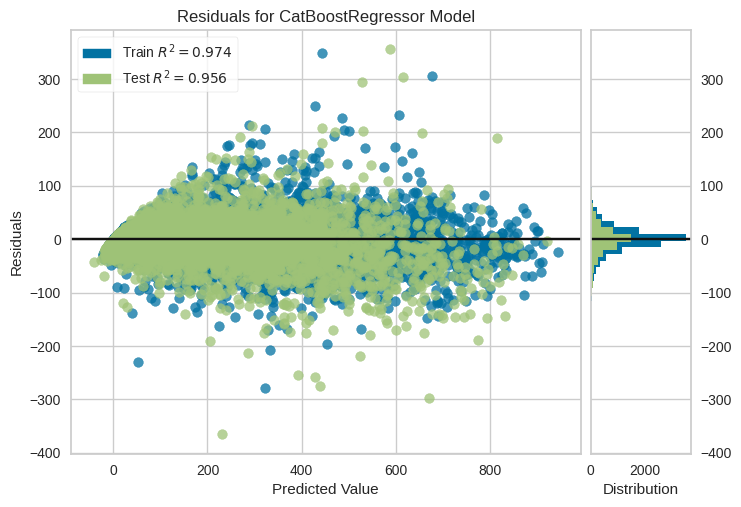

In [30]:
plot_model(best_model, plot='residuals')

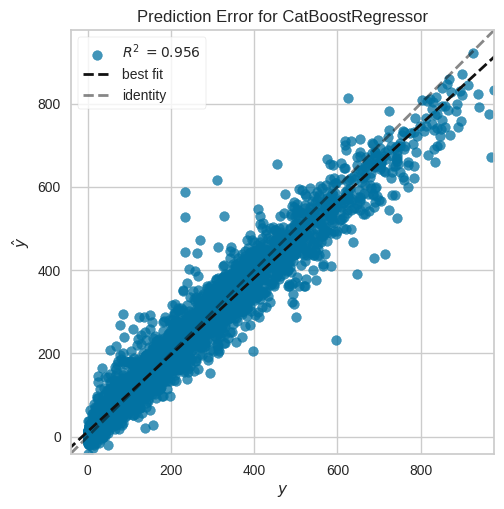

In [31]:
plot_model(best_model, plot='error')

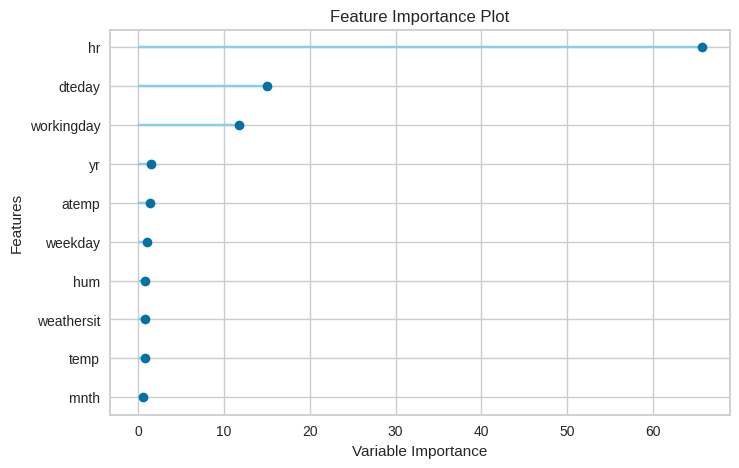

In [32]:
plot_model(best_model, plot='feature')

In [33]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [34]:
# predict on test set
holdout_predictions = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,24.4258,1477.7386,38.4414,0.9558,0.4185,0.3791


In [35]:
# show predictions
holdout_predictions.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,2011-09-03,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,254.961655
7823,2011-11-27,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,324.631990
15426,2012-10-09,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,104.013294
15028,2012-09-23,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,318.411990
12290,2012-06-01,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,329.140488


In [1]:
new_data = data.copy()
new_data = new_data.drop('cnt', axis=1, inplace=True)
new_data.head()

NameError: name 'data' is not defined